# Quantitative Fundamental Analysis 1

Fundamental analysis (FA) is a method of measuring a security's intrinsic value by examining related economic and financial factors. Fundamental analysts study anything that can affect the security's value, from macroeconomic factors such as the state of the economy and industry conditions to microeconomic factors like the effectiveness of the company's management.The end goal is to arrive at a number that an investor can compare with a security's current price in order to see whether the security is undervalued or overvalued.

This method of stock analysis is considered to be in contrast to technical analysis, which forecasts the direction of prices through an analysis of historical market data such as price and volume.

## Quantitative FA

Quantitative fundamentals are hard numbers. They are the measurable characteristics of a business. That's why the biggest source of quantitative data is financial statements. Revenue, profit, assets, and more can be measured with great precision.

In [1]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf

Now lets scrape wikipedia page to get all the ticker symbols of Dow Jones Industrial Average

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.88%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.56%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.88%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.15%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.40%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.19%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.05%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.00%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.28%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,2.32%


There are 30 stocks in the index and their respective tickers are listed which we are interest in.

In [3]:
tickers = df.Symbol.to_list()
tickers

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

Lets get fundamental information on these stocks using yahoofinance.

In [6]:
infos = []
for tick in tickers:
    infos.append(yf.Ticker(tick).info)

infos = pd.DataFrame(infos)

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
0,55144-1000,Industrials,95000,3M Company operates as a diversified technolog...,Saint Paul,651 733 1110,MN,United States,[],https://www.3m.com,...,129.5250,128.280,https://logo.clearbit.com/3m.com,1.7946,NaN,NaN,NaN,NaN,NaN,NaN
1,10285,Financial Services,64000,"American Express Company, together with its su...",New York,212 640 2000,NY,United States,[],https://www.americanexpress.com,...,141.3300,141.150,https://logo.clearbit.com/americanexpress.com,1.1905,NaN,NaN,NaN,NaN,NaN,NaN
2,91320-1799,Healthcare,24200,"Amgen Inc. discovers, develops, manufactures, ...",Thousand Oaks,805 447 1000,CA,United States,[],https://www.amgen.com,...,247.9100,249.150,https://logo.clearbit.com/amgen.com,1.4636,805 447 1010,NaN,NaN,NaN,NaN,NaN
3,95014,Technology,154000,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,145.2450,145.710,https://logo.clearbit.com/apple.com,2.5599,NaN,NaN,NaN,NaN,NaN,NaN
4,60606-1596,Industrials,142000,"The Boeing Company, together with its subsidia...",Chicago,312 544 2000,IL,United States,[],https://www.boeing.com,...,135.6000,137.975,https://logo.clearbit.com/boeing.com,6.5305,NaN,NaN,NaN,NaN,NaN,NaN
5,60015,Industrials,107700,Caterpillar Inc. manufactures and sells constr...,Deerfield,224-551-4000,IL,United States,[],https://www.caterpillar.com,...,175.7823,179.300,https://logo.clearbit.com/caterpillar.com,1.4134,NaN,Suite 100,NaN,NaN,NaN,NaN
6,94583-2324,Energy,42595,"Chevron Corporation, through its subsidiaries,...",San Ramon,925 842 1000,CA,United States,[],https://www.chevron.com,...,141.2104,141.800,https://logo.clearbit.com/chevron.com,3.5579,NaN,NaN,NaN,NaN,NaN,NaN
7,95134,Technology,79500,"Cisco Systems, Inc. designs, manufactures, and...",San Jose,408 526 4000,CA,United States,[],https://www.cisco.com,...,43.3582,43.400,https://logo.clearbit.com/cisco.com,2.1761,NaN,NaN,NaN,NaN,NaN,NaN
8,30313,Consumer Defensive,79000,"The Coca-Cola Company, a beverage company, man...",Atlanta,404 676 2121,GA,United States,[],https://www.coca-colacompany.com,...,62.9650,62.890,https://logo.clearbit.com/coca-colacompany.com,3.5002,NaN,NaN,NaN,NaN,NaN,NaN
9,91521,Communication Services,152000,"The Walt Disney Company, together with its sub...",Burbank,818 560 1000,CA,United States,[],https://www.thewaltdisneycompany.com,...,94.1435,95.030,https://logo.clearbit.com/thewaltdisneycompany...,0.5755,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
infos = infos.set_index('symbol')
infos

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,regularMarketPrice,preMarketPrice,logo_url,trailingPegRatio,fax,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid
symbol,,,,,,,,,,,,,,,,,,,,,
MMM,55144-1000,Industrials,95000,3M Company operates as a diversified technolog...,Saint Paul,651 733 1110,MN,United States,[],https://www.3m.com,...,129.5250,128.280,https://logo.clearbit.com/3m.com,1.7946,NaN,NaN,NaN,NaN,NaN,NaN
AXP,10285,Financial Services,64000,"American Express Company, together with its su...",New York,212 640 2000,NY,United States,[],https://www.americanexpress.com,...,141.3300,141.150,https://logo.clearbit.com/americanexpress.com,1.1905,NaN,NaN,NaN,NaN,NaN,NaN
AMGN,91320-1799,Healthcare,24200,"Amgen Inc. discovers, develops, manufactures, ...",Thousand Oaks,805 447 1000,CA,United States,[],https://www.amgen.com,...,247.9100,249.150,https://logo.clearbit.com/amgen.com,1.4636,805 447 1010,NaN,NaN,NaN,NaN,NaN
AAPL,95014,Technology,154000,"Apple Inc. designs, manufactures, and markets ...",Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,...,145.2450,145.710,https://logo.clearbit.com/apple.com,2.5599,NaN,NaN,NaN,NaN,NaN,NaN
BA,60606-1596,Industrials,142000,"The Boeing Company, together with its subsidia...",Chicago,312 544 2000,IL,United States,[],https://www.boeing.com,...,135.6000,137.975,https://logo.clearbit.com/boeing.com,6.5305,NaN,NaN,NaN,NaN,NaN,NaN
CAT,60015,Industrials,107700,Caterpillar Inc. manufactures and sells constr...,Deerfield,224-551-4000,IL,United States,[],https://www.caterpillar.com,...,175.7823,179.300,https://logo.clearbit.com/caterpillar.com,1.4134,NaN,Suite 100,NaN,NaN,NaN,NaN
CVX,94583-2324,Energy,42595,"Chevron Corporation, through its subsidiaries,...",San Ramon,925 842 1000,CA,United States,[],https://www.chevron.com,...,141.2104,141.800,https://logo.clearbit.com/chevron.com,3.5579,NaN,NaN,NaN,NaN,NaN,NaN
CSCO,95134,Technology,79500,"Cisco Systems, Inc. designs, manufactures, and...",San Jose,408 526 4000,CA,United States,[],https://www.cisco.com,...,43.3582,43.400,https://logo.clearbit.com/cisco.com,2.1761,NaN,NaN,NaN,NaN,NaN,NaN
KO,30313,Consumer Defensive,79000,"The Coca-Cola Company, a beverage company, man...",Atlanta,404 676 2121,GA,United States,[],https://www.coca-colacompany.com,...,62.9650,62.890,https://logo.clearbit.com/coca-colacompany.com,3.5002,NaN,NaN,NaN,NaN,NaN,NaN


Now we have the basic fundamental data about the stocks in the DOW jones industrial average. Lets figure out the columns that are interesting for analysis.

In [8]:
for col in infos.columns:
    print(col)

zip
sector
fullTimeEmployees
longBusinessSummary
city
phone
state
country
companyOfficers
website
maxAge
address1
industry
ebitdaMargins
profitMargins
grossMargins
operatingCashflow
revenueGrowth
operatingMargins
ebitda
targetLowPrice
recommendationKey
grossProfits
freeCashflow
targetMedianPrice
currentPrice
earningsGrowth
currentRatio
returnOnAssets
numberOfAnalystOpinions
targetMeanPrice
debtToEquity
returnOnEquity
targetHighPrice
totalCash
totalDebt
totalRevenue
totalCashPerShare
financialCurrency
revenuePerShare
quickRatio
recommendationMean
exchange
shortName
longName
exchangeTimezoneName
exchangeTimezoneShortName
isEsgPopulated
gmtOffSetMilliseconds
quoteType
messageBoardId
market
annualHoldingsTurnover
enterpriseToRevenue
beta3Year
enterpriseToEbitda
52WeekChange
morningStarRiskRating
forwardEps
revenueQuarterlyGrowth
sharesOutstanding
fundInceptionDate
annualReportExpenseRatio
totalAssets
bookValue
sharesShort
sharesPercentSharesOut
fundFamily
lastFiscalYearEnd
heldPercentInsti

In [22]:
fundamental = ['industry','operatingCashflow','ebitda','freeCashflow','pegRatio','earningsGrowth', 'currentRatio','debtToEquity','returnOnEquity','totalCash','totalDebt','quickRatio','beta3Year','beta','forwardEps','priceToBook','priceToSalesTrailing12Months','forwardPE','dividendRate','trailingPE','marketCap','dividendYield']
#lets filter out the fundamental data 
fund_info = infos[infos.columns[infos.columns.isin(fundamental)]]
fund_info

,industry,operatingCashflow,ebitda,freeCashflow,earningsGrowth,currentRatio,debtToEquity,returnOnEquity,totalCash,totalDebt,...,forwardEps,priceToBook,beta,priceToSalesTrailing12Months,pegRatio,forwardPE,dividendRate,trailingPE,marketCap,dividendYield
symbol,,,,,,,,,,,,,,,,,,,,,
MMM,Conglomerates,6776999936,9.458000e+09,4.292875e+09,-0.184,1.579,117.329,0.38880,3359000064,17603999744,...,11.31,4.936918,0.945083,2.086077,2.10,11.452253,5.96,13.478148,7.370736e+10,0.0463
AXP,Credit Services,16245000192,NaN,NaN,-0.004,1.630,181.374,0.33840,25721999360,40597000192,...,11.28,4.767254,1.142613,2.322378,1.03,12.529256,2.08,14.118881,1.064300e+11,0.0147
AMGN,Drug Manufacturers—General,9320999936,1.289200e+10,7.442625e+09,-0.053,1.437,4023.362,1.11668,6544000000,36854001664,...,18.98,144.553940,0.581524,5.032434,2.01,13.061645,7.76,24.472853,1.324335e+11,0.0312
AAPL,Consumer Electronics,116425998336,1.306340e+11,8.438463e+10,0.086,0.927,178.016,1.49271,51511001088,119980998656,...,6.54,34.931458,1.194550,6.089937,2.42,22.208715,0.92,23.617071,2.350819e+12,0.0063
BA,Aerospace & Defense,-3244999936,5.200000e+07,-9.698750e+08,NaN,1.298,NaN,NaN,12282000384,57741000704,...,5.61,NaN,1.367816,1.313885,-7.56,24.171124,NaN,NaN,8.022584e+10,NaN
CAT,Farm & Heavy Construction Machinery,5583000064,1.045500e+10,4.762250e+09,0.032,1.441,219.828,0.38554,6474999808,37583998976,...,14.28,5.493884,0.993188,1.779996,0.58,12.309686,4.80,14.746838,9.375771e+10,0.0268
CVX,Oil & Gas Integrated,33045999616,3.852200e+10,2.107338e+10,3.473,1.433,19.941,0.14690,11704000512,29333000192,...,15.51,1.897505,1.132822,1.568906,0.34,9.104475,5.68,13.271654,2.774516e+11,0.0398
CSCO,Communication Equipment,14053000192,1.607100e+10,1.035212e+10,0.076,1.490,25.985,0.29790,20109000704,10497999872,...,3.54,4.452932,0.962111,3.480828,2.00,12.248079,1.52,15.213404,1.795446e+11,0.0350
KO,Beverages—Non-Alcoholic,11612000256,1.315800e+10,6.916875e+09,0.231,1.179,157.010,0.42064,10355999744,42142998528,...,2.64,10.975248,0.557684,6.802451,3.88,23.850378,1.76,26.567513,2.729551e+11,0.0279


Now we are ready to compare stocks in DOW JONES based on their fundamental data.

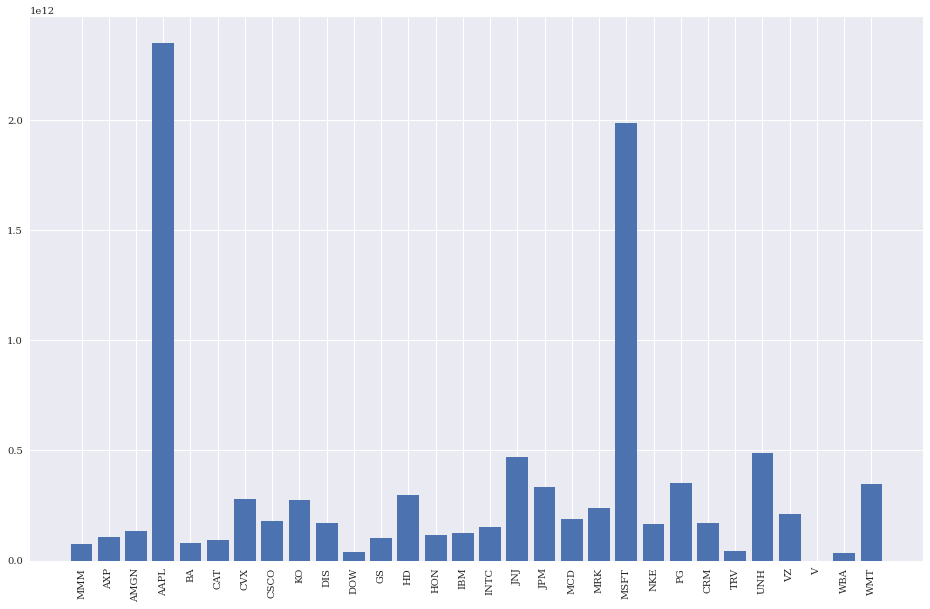

In [18]:
#First let plot out the companies with the biggest market cap
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['marketCap'])
plt.xticks(rotation = 90)
plt.show()

In [20]:
fund_info['marketCap'].nlargest(10)

symbol
AAPL    2.350819e+12
MSFT    1.984772e+12
UNH     4.871442e+11
JNJ     4.703890e+11
PG      3.529255e+11
WMT     3.462756e+11
JPM     3.321510e+11
HD      2.966293e+11
CVX     2.774516e+11
KO      2.729551e+11
Name: marketCap, dtype: float64

As suspected technology stocks are the top 2 then healthcare dominates which is also not suprising given the past few years.

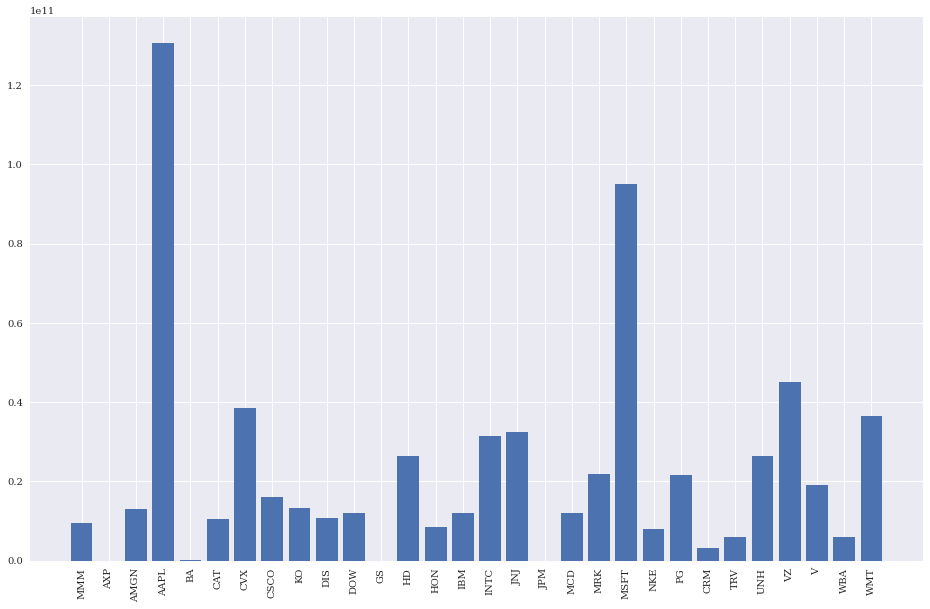

In [21]:
##First let plot out the companies with the biggest ebita
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['ebitda'])
plt.xticks(rotation = 90)
plt.show()

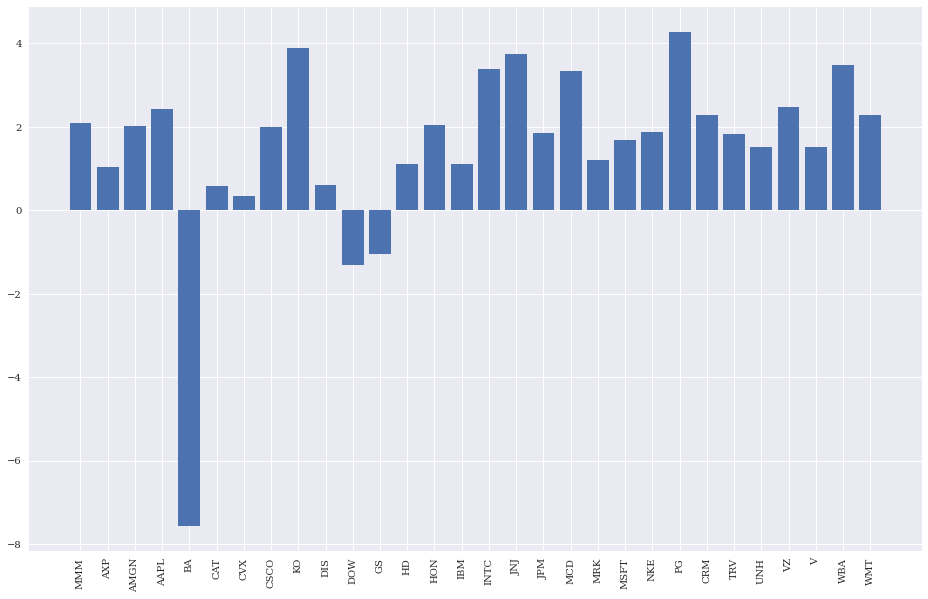

In [23]:
##First let plot out the companies with the biggest pegratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['pegRatio'])
plt.xticks(rotation = 90)
plt.show()

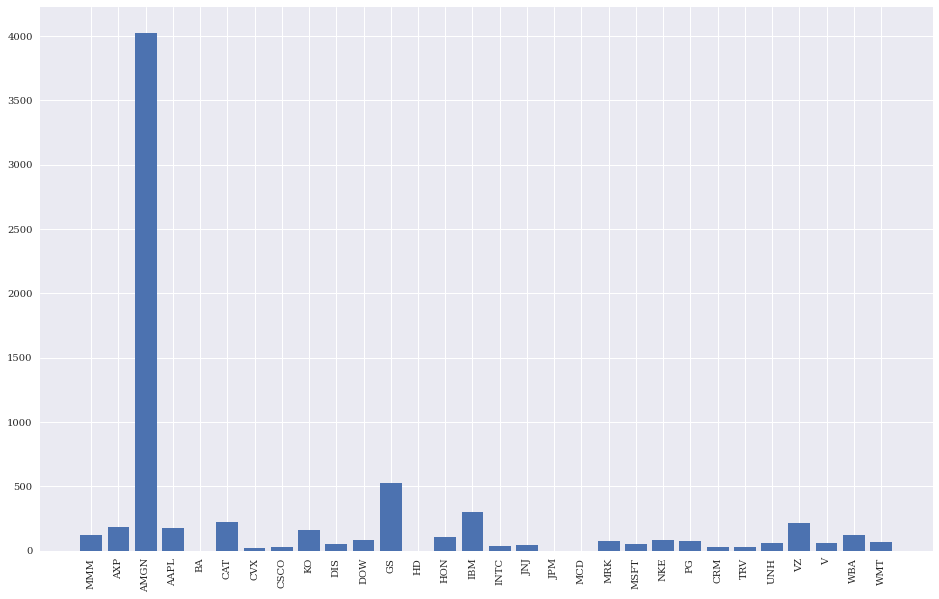

In [24]:
##First let plot out the companies with the biggest debt to equity ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['debtToEquity'])
plt.xticks(rotation = 90)
plt.show()

Woow Amgen is what you call being leveraged to its tits. Hope this is a data glitch rather than actual leverage.

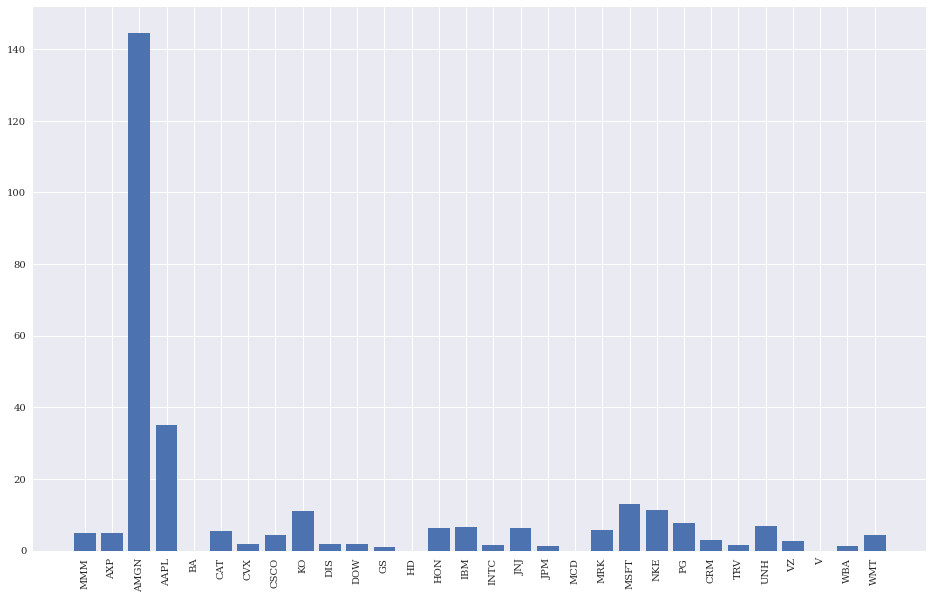

In [25]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['priceToBook'])
plt.xticks(rotation = 90)
plt.show()

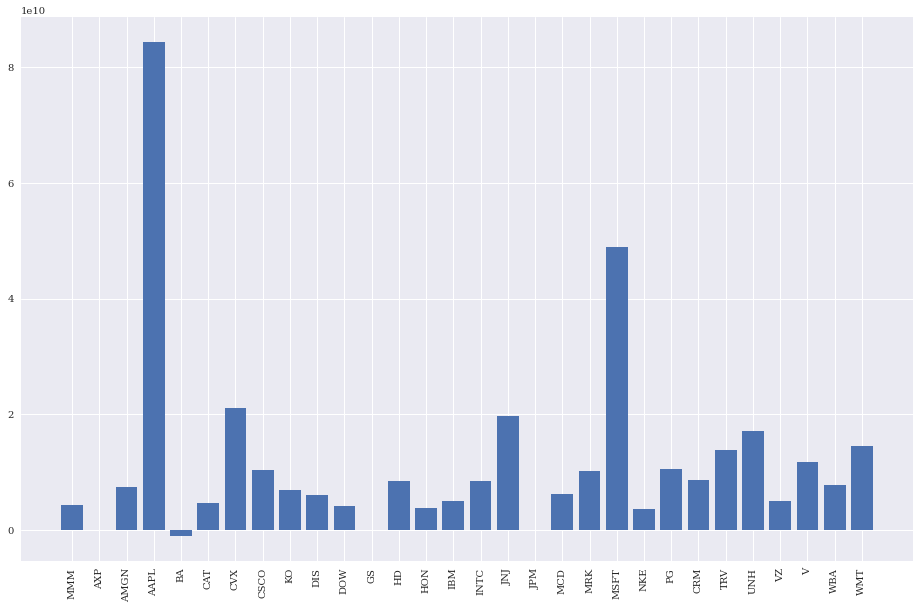

In [26]:

##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['freeCashflow'])
plt.xticks(rotation = 90)
plt.show()

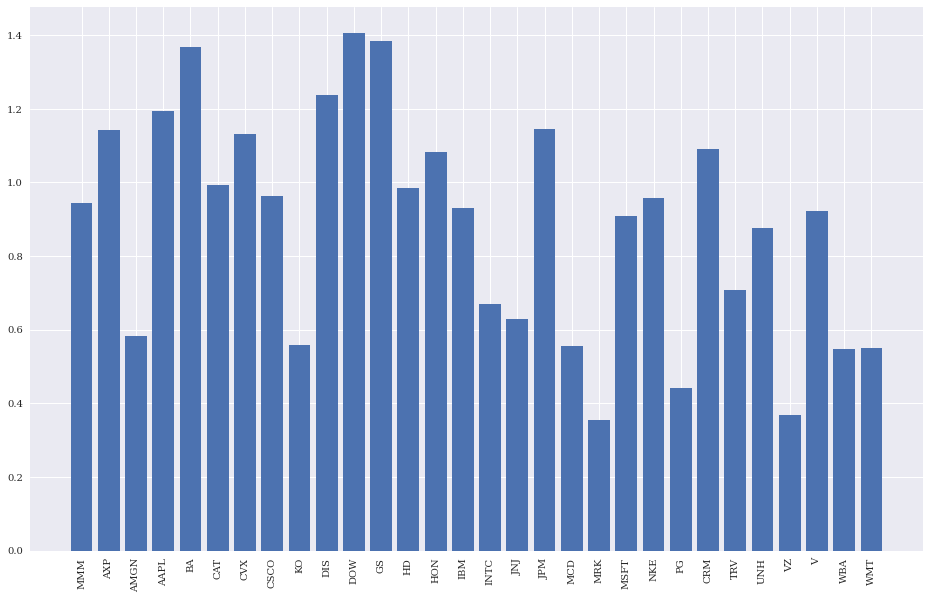

In [28]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['beta'])
plt.xticks(rotation = 90)
plt.show()

## To do balance sheet analysis and scoring stocks based on Piotroski F-score.